In [204]:
import pandas as pd
import numpy as np
import seaborn as sns


In [205]:
House_df = pd.read_csv('./DataBase/train.csv')
House_df.info()
House_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Data Clean cells
Conversion of variables into numbers

In [206]:
#Variable: MSZoning
House_df["MSZoning"].isnull().sum() # No null values 
House_df['MSZoning'] = House_df['MSZoning'].replace({'A': 1, 'C (all)' : 2 , 'FV' : 3 , 'I': 4 , 'RH': 5, 'RL': 6 , 'RP':7, 'RM' : 8}) # Replace variables with numbers
House_df['MSZoning'].head(50)

0     6
1     6
2     6
3     6
4     6
5     6
6     6
7     6
8     8
9     6
10    6
11    6
12    6
13    6
14    6
15    8
16    6
17    6
18    6
19    6
20    6
21    8
22    6
23    8
24    6
25    6
26    6
27    6
28    6
29    8
30    2
31    6
32    6
33    6
34    6
35    6
36    6
37    6
38    6
39    6
40    6
41    6
42    6
43    6
44    6
45    6
46    6
47    3
48    8
49    6
Name: MSZoning, dtype: int64

In [207]:
#Variable: MSSubClass
House_df["MSSubClass"].isnull().sum() # No null values 
# MSSubClass is already numerical

0

In [208]:
#Variable: LotFrontage
House_df["LotFrontage"].isnull().sum() # Some NaN values need to be removed


0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

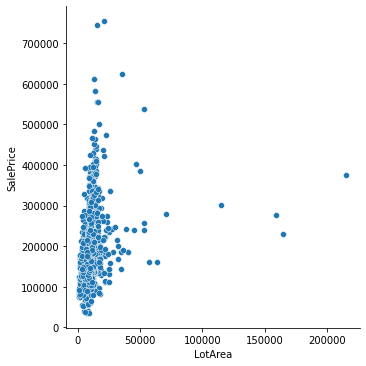

In [203]:
#Variable: LotArea
House_df["LotArea"].isnull().sum() # No null values no cleaning needed
sns.relplot(x = "LotArea" , y = "SalePrice" , data = House_df)


In [191]:
#Variable: Street
print(House_df["Street"].isnull().sum()) # No null values no cleaning needed
arr = np.array([])
arr = House_df['Street']
arr = arr[arr == 'Grvl']
print(arr.size) #Only 6 entries out of 1460, this variable will be excluded.
House_df = House_df.drop(['Street'], axis = 1) #Drop this column

0
6


In [192]:
#Variable Alley
print(House_df["Alley"].isna().sum()) # 1369 NaN values, this variable will be excluded
House_df = House_df.drop(['Alley'], axis = 1)

1369


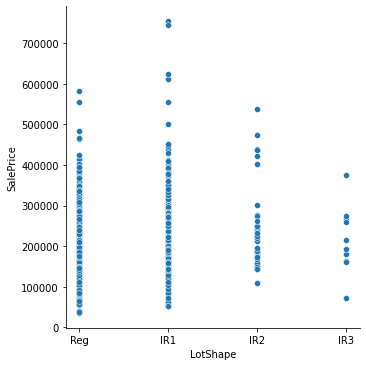

In [193]:
#Variable LotShape
sns.relplot(x = "LotShape" , y = "SalePrice" , data = House_df)
House_df = House_df.drop(['LotShape'], axis = 1)
## looking at the distributions of LotShape vs SalePrice we see that 
## the LotShape has little effect on the SalePrice

0


<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

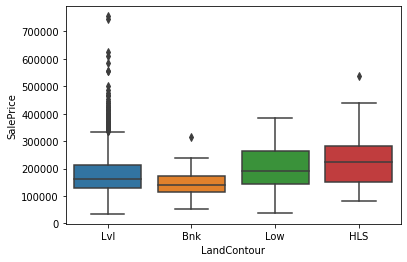

In [196]:
#Variable LandContour
print(House_df["LandContour"].isna().sum()) ## Check if there are NaN values
sns.boxplot(x = House_df["LandContour"] , y = House_df["SalePrice"])

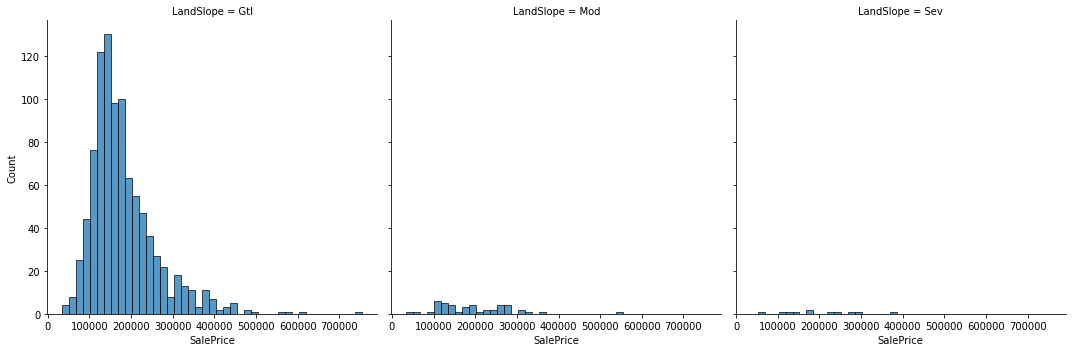

In [5]:

House_df_first_1000 = House_df[:1000]
sns.displot(data = House_df_first_1000 , x = "SalePrice", col = "LandSlope")


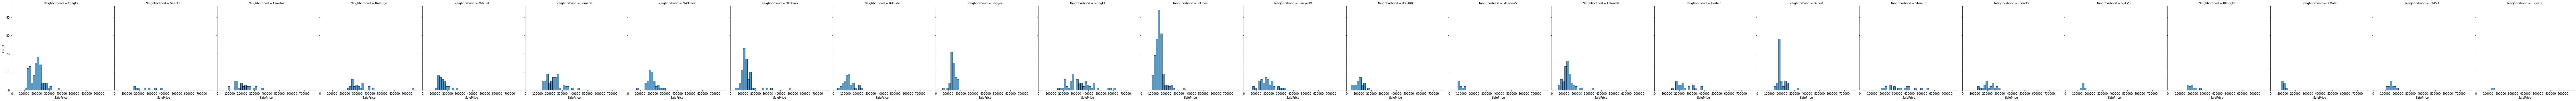

In [52]:
#House_df_first_1000 = House_df[:10]
#sns.displot(data = House_df_first_1000 , x = "SalePrice", col = "Neighborhood")

Next section will examine the effects of the building type of the price of the house

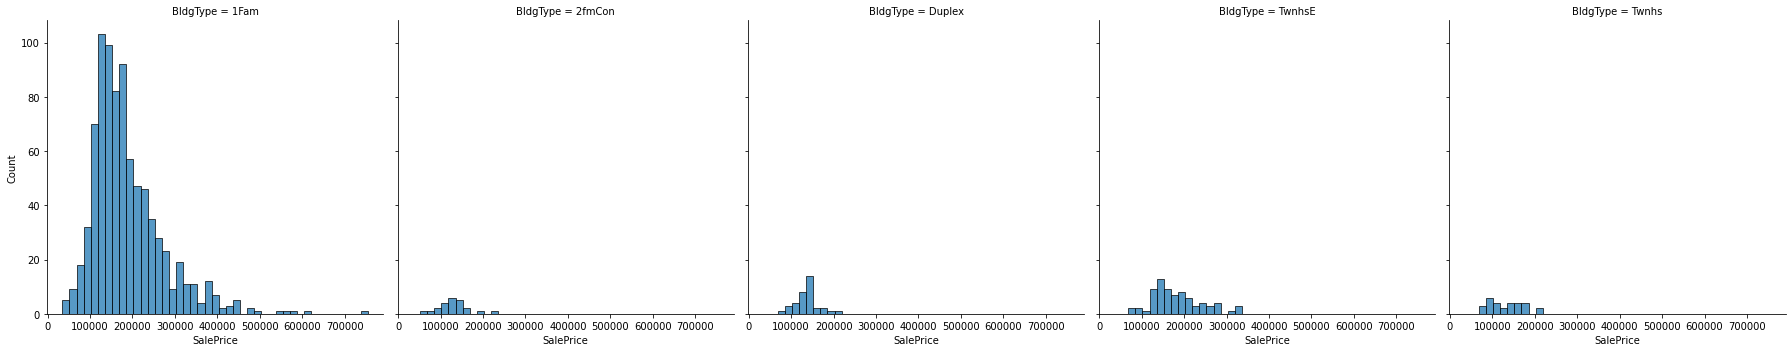

In [53]:
#sns.displot(data = House_df_first_1000 , x = "SalePrice", col = "BldgType")